### Model a BHD system

In [8]:
import numpy as np
import pykat
from pykat import finesse
import matplotlib.pyplot as plt

In [9]:
base = finesse.kat()
base.load('finesse_BHD.kat', preserveConstants=True)

Parsing `set A1 pdA1 re` into pykat object not implemented yet, added as extra line.
Parsing `set A2 pdA2 re` into pykat object not implemented yet, added as extra line.
Parsing `set B1 pdB1 re` into pykat object not implemented yet, added as extra line.
Parsing `set B2 pdB2 re` into pykat object not implemented yet, added as extra line.
Parsing `set qA1 snA1 re` into pykat object not implemented yet, added as extra line.
Parsing `set qA2 snA2 re` into pykat object not implemented yet, added as extra line.
Parsing `set qB1 snB1 re` into pykat object not implemented yet, added as extra line.
Parsing `set qB2 snB2 re` into pykat object not implemented yet, added as extra line.


In [21]:
outs = {}
for v in [7900,8000,8100]:
    kat = base.deepcopy()
    kat.parse('''
    fsig noise LO amp 10 0
    xaxis noise amp log 1E-9 1E-7 801
    maxtem 0
    ''')
    kat.OMC1_FM1_HR.T = v*1e-6
    kat.OMC1_FM2_HR.T = v*1e-6
    # Evaluate the model
    # Express the channels in units of LO RIN (1/rtHz)
    outs[str(v)+'u'] = kat.run()

--------------------------------------------------------------
Running kat - Started at 2019-08-30 14:40:16.375071


100% | ETA:  0:00:00 | Calculating                                             

Used Finesse 2.2 at /Users/ajones/anaconda3/bin/kat

Finished in 4.59678 seconds
--------------------------------------------------------------
Running kat - Started at 2019-08-30 14:40:21.045680


100% | ETA:  0:00:00 | Calculating                                             

Used Finesse 2.2 at /Users/ajones/anaconda3/bin/kat

Finished in 4.42446 seconds
--------------------------------------------------------------
Running kat - Started at 2019-08-30 14:40:25.549619


 88% | ETA:  0:00:00 | Calculating                                             

Used Finesse 2.2 at /Users/ajones/anaconda3/bin/kat

Finished in 4.44051 seconds


100% | ETA:  0:00:00 | Calculating                                             

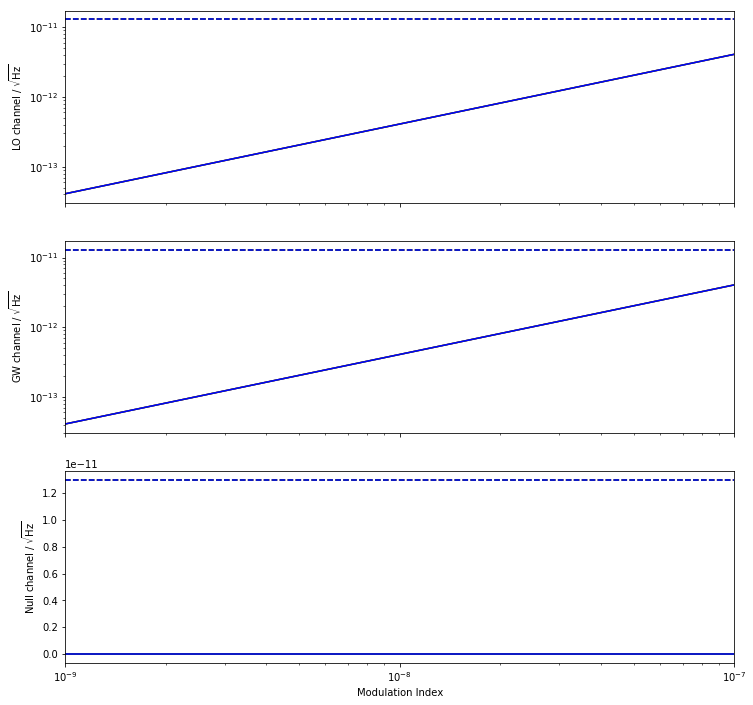

In [22]:
# Plot the BHD channel responses
fig, ax = plt.subplots(3,1,figsize=(12,12), sharex=True)
colours = iter(['r','g','b','k','m','c'])

for k,v in outs.items():
    out = v
    col = next(colours)
    
    # RIN signal in BHD channels
    LOchan = out['LOchan'] / kat.LO.P.value
    GWchan = np.abs(out['GWchan']) / kat.LO.P.value
    nullChan = out['nullChan'] / kat.LO.P.value

    # Shot noise levels
    snLOchan = out['snLOchan'] / kat.LO.P.value
    snGWchan = out['snGWchan'] / kat.LO.P.value
    snNullChan = out['snNullChan'] / kat.LO.P.value

    SNRdB = 20 * np.log10(GWchan / snGWchan)

    ax[0].plot(out.x, LOchan, color=col, label=f'k')
    ax[0].plot(out.x, snLOchan, color=col, linestyle='--')

    ax[1].plot(out.x, GWchan, color=col, label='GW channel')
    ax[1].plot(out.x, snGWchan, color=col, linestyle='--')

    ax[2].plot(out.x, nullChan, color=col, label='Null channel')
    ax[2].plot(out.x, snNullChan, color=col, linestyle='--')

ax[0].set_xlim(out.x[0], out.x[-1])
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_ylabel(r'$\rm LO\;channel\;/\;\sqrt{Hz}$')
ax[1].set_ylabel(r'$\rm GW\;channel\;/\;\sqrt{Hz}$')
ax[2].set_ylabel(r'$\rm Null\;channel\;/\;\sqrt{Hz}$')
ax[2].set_xlabel('Modulation Index');